# Linear Regression with PyTorch

## 1. Basic
- 2개의 연속변수(x, y)사이의 관계를 이해한다.
- Example
    - x: independent variable
        - weight
    - y: dependent variable
        - height
- $y = \alpha x + \beta$

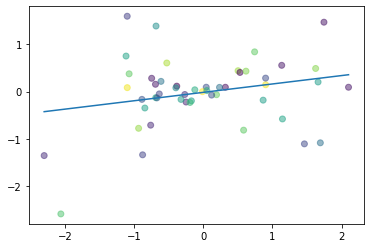

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

## 2. Dataset

In [2]:
x = [i for i in range(11)]

In [3]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
# Convert to numpy
x_train = np.array(x, dtype=np.float32)
x_train.shape

(11,)

In [5]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [6]:
y = [i*2+1 for i in range(11)]

In [7]:
print(y)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [8]:
y_train = np.array(y, dtype=np.float32)
y_train.shape

(11,)

In [9]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

## 3. Model

In [10]:
import torch
import torch.nn as nn

In [11]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [12]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

**MSE Loss 참고**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [13]:
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 4. Train

In [14]:
num_epochs = 20
for epoch in range(num_epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # gradient 초기화
    optimizer.zero_grad() 
    
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 190.50421142578125
epoch 2, loss 15.564559936523438
epoch 3, loss 1.2950036525726318
epoch 4, loss 0.1307964324951172
epoch 5, loss 0.035554543137550354
epoch 6, loss 0.02750810980796814
epoch 7, loss 0.026576943695545197
epoch 8, loss 0.026229264214634895
epoch 9, loss 0.025932250544428825
epoch 10, loss 0.02564239501953125
epoch 11, loss 0.025355877354741096
epoch 12, loss 0.025072772055864334
epoch 13, loss 0.024792814627289772
epoch 14, loss 0.02451602928340435
epoch 15, loss 0.024242235347628593
epoch 16, loss 0.0239715576171875
epoch 17, loss 0.02370383031666279
epoch 18, loss 0.023439090698957443
epoch 19, loss 0.02317734993994236
epoch 20, loss 0.022918516770005226


In [15]:
# 예측 결과 확인
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.71838635],
       [ 2.7589414 ],
       [ 4.799496  ],
       [ 6.840051  ],
       [ 8.880607  ],
       [10.921162  ],
       [12.961717  ],
       [15.002272  ],
       [17.042826  ],
       [19.08338   ],
       [21.123936  ]], dtype=float32)

In [16]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

## Results

In [ ]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()